Task 1: Prediction using Supervised ML
Predict the percentage of marks of a student can achieve based on the number of study hours
Organization: The Sparks Foundation


In [35]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt  
import dtale
import seaborn as sns
from ipywidgets import interact, widgets,Layout
from sklearn import metrics
%matplotlib inline

In [36]:
url = "http://bit.ly/w-data"
input_data=pd.read_csv(url)
print("Importing the data")

Importing the data


In [37]:
input_data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [38]:
input_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

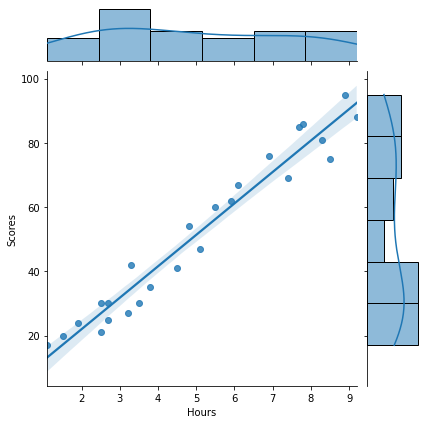

In [39]:
sns.jointplot(x='Hours', y='Scores',data=input_data,kind='reg')

In [42]:
dtale.show(input_data,ignore_duplicate=True)

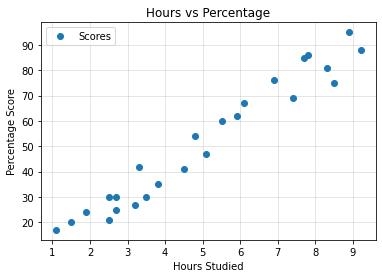

In [43]:
# Plotting the distribution of scores
input_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.grid(alpha = 0.4)
plt.show()

In [44]:
X = input_data.iloc[:, :-1].values  
y = input_data.iloc[:, 1].values

In [45]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

In [46]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 
print("Model has beeen trained succesfully.")

Model has beeen trained succesfully.


In [47]:
print("Intercept(c) : ", (regressor.intercept_))
print("Slope(m)     : ", (regressor.coef_))

Intercept(c) :  2.018160041434683
Slope(m)     :  [9.91065648]


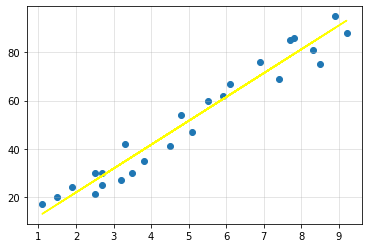

In [48]:
line = regressor.coef_*X+regressor.intercept_ 
plt.scatter(X, y)
plt.plot(X, line,color = "yellow");
plt.grid(alpha = 0.4)
plt.show()

In [49]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [50]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [51]:
def PredictScore(x):
    hours = np.array(x).reshape(-1, 1)
    own_pred = regressor.predict(hours)
    print("No of Hours = {}".format(hours))
    print("Predicted Score = {}".format(own_pred[0]))

In [52]:
interact(PredictScore,x=widgets.FloatSlider(min=5,
                                            max=10,
                                            value=9.25,
                                            step=0.01,
                                            description='Hours', 
                                            layout=Layout(width='900px')))

interactive(children=(FloatSlider(value=9.25, description='Hours', layout=Layout(width='900px'), max=10.0, min…

<function __main__.PredictScore(x)>

In [53]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975


In [54]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 21.5987693072174
